# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Импорт

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# omsky_gamedev

# Предобработка Датасета

## Загружаем DataSet

In [3]:
df = pd.read_csv('moldova_cars_task.csv')
df


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,NaN,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016.0,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [4]:
df.dtypes

Make                     object
Model                    object
Year                    float64
Style                    object
Distance                float64
Engine_capacity(cm3)    float64
Fuel_type                object
Transmission             object
Price(euro)             float64
dtype: object

## Нивелирование анамалий
- Заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму)
- Удаление дубликатов

In [5]:
df = df.drop_duplicates()
df = df.apply(lambda a: a.fillna(a.mean() if a.dtypes ==
              np.float64 else a.median() if a.dtypes == np.int64 else a.mode()[0]))
df


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011.0,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014.0,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998.0,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012.0,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006.0,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41001,Land Rover,Freelander,2002.0,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0
41002,Dacia,E Class,2015.0,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009.0,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41005,Mazda,6,2006.0,Combi,370000.0,2000.0,Diesel,Manual,4000.0


In [6]:
df.isnull().sum()


Make                    0
Model                   0
Year                    0
Style                   0
Distance                0
Engine_capacity(cm3)    0
Fuel_type               0
Transmission            0
Price(euro)             0
dtype: int64

## Преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума)

In [7]:
names = dict(df.loc[:, list(filter(lambda a: df[a].dtypes == 'object', df.columns))].apply(lambda a: a.unique()))
names

{'Make': array(['Toyota', 'Renault', 'Volkswagen', 'Opel', 'Mercedes', 'BMW',
        'KIA', 'Volvo', 'Nissan', 'Hyundai', 'Audi', 'GAZ', 'Tesla',
        'Lincoln', 'Lexus', 'Dodge', 'Porsche', 'Mazda', 'Dacia',
        'Peugeot', 'Vaz', 'Ford', 'Seat', 'Honda', 'Skoda', 'Chevrolet',
        'Subaru', 'Citroen', 'Fiat', 'Jaguar', 'Infiniti', 'Mitsubishi',
        'Land Rover', 'Suzuki', 'Daewoo', 'Datsun', 'Mini', 'Changan',
        'Rover', 'Saab', 'Cadillac', 'GMC', 'Chrysler', 'Jeep', 'Acura',
        'Smart', 'Isuzu', 'Ravon', 'Moskvich / Izh', 'Chery', 'Hummer',
        'Alfa Romeo', 'UAZ', 'Lancia', 'Zaz', 'Daihatsu', 'Ssangyong',
        'Byd', 'Alta marca', 'LuAZ', 'Maserati', 'Bentley', 'Jac', 'Lifan',
        'Brilliance', 'Pontiac', 'Great Wall', 'Buick', 'Groz', 'BAIC',
        'Ferrari', 'Lada', 'Scion', 'Haval', 'Abarth', 'Haima', 'Zotye',
        'Geely', 'Tata', 'Faw', 'Lamborghini', 'McLaren',
        'Mercedes-Maybach', 'Saturn', 'Aston Martin', 'ARO', 'Xpeng'],
    

In [8]:
def replacer(a):
    return a.map(lambda k: np.where(names[a.name] == k)[0][0]) if a.dtypes == 'object' else a


In [9]:
df = df.apply(lambda a: a.map(lambda k: np.where(names[a.name] == k)[0][0]) if a.dtypes == 'object' else a)
df


,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,0,0,2011.0,0,195000.0,1800.0,0,0,7750.0
1,1,1,2014.0,1,135000.0,1500.0,1,1,8550.0
2,2,2,1998.0,0,1.0,1400.0,2,1,2200.0
3,1,3,2012.0,1,110000.0,1500.0,1,1,6550.0
4,3,4,2006.0,1,200000.0,1600.0,3,1,4100.0
...,...,...,...,...,...,...,...,...,...
41001,32,87,2002.0,6,225000.0,1800.0,3,1,4400.0
41002,18,10,2015.0,1,89000.0,1500.0,1,1,7000.0
41003,1,379,2009.0,0,225.0,1500.0,1,1,4500.0
41005,17,143,2006.0,9,370000.0,2000.0,1,1,4000.0


In [10]:
df['Model'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## Сохранение

In [11]:
df.to_csv('moded__moldova_cars_task.csv')

# Основное задание

## Загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку.

### Загрузите датасет для регрессии.

In [12]:
models = pd.read_csv('moded__moldova_cars_task.csv')
models

,Unnamed: 0,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,0,0,0,2011.0,0,195000.0,1800.0,0,0,7750.0
1,1,1,1,2014.0,1,135000.0,1500.0,1,1,8550.0
2,2,2,2,1998.0,0,1.0,1400.0,2,1,2200.0
3,3,1,3,2012.0,1,110000.0,1500.0,1,1,6550.0
4,4,3,4,2006.0,1,200000.0,1600.0,3,1,4100.0
...,...,...,...,...,...,...,...,...,...,...
37413,41001,32,87,2002.0,6,225000.0,1800.0,3,1,4400.0
37414,41002,18,10,2015.0,1,89000.0,1500.0,1,1,7000.0
37415,41003,1,379,2009.0,0,225.0,1500.0,1,1,4500.0
37416,41005,17,143,2006.0,9,370000.0,2000.0,1,1,4000.0


### Выделите целевой признак и предикторы.

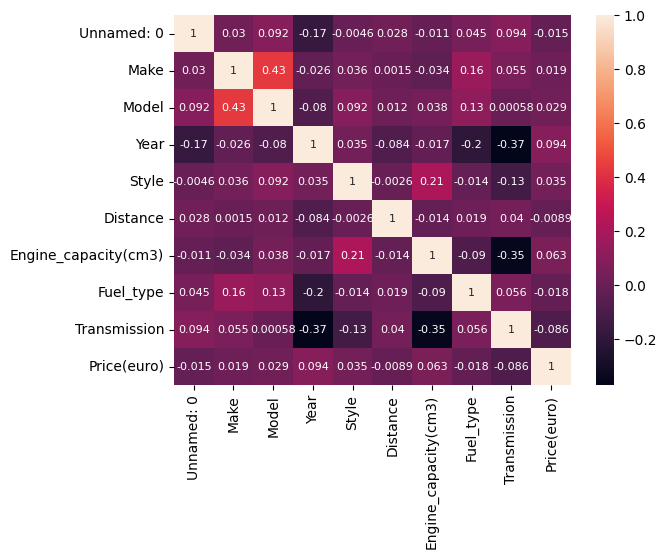

In [13]:
fig = sns.heatmap(models.corr(method='pearson'), annot=True, annot_kws={"fontsize":8}).get_figure()

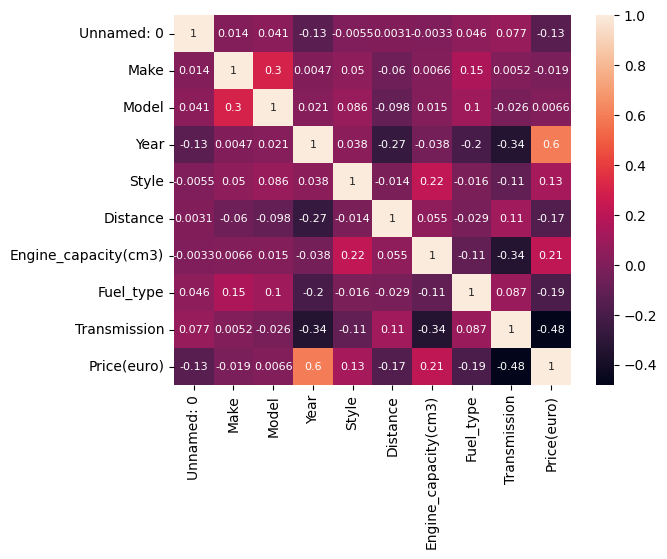

In [14]:
fig = sns.heatmap(models.corr(method='kendall'), annot=True, annot_kws={"fontsize":8}).get_figure()

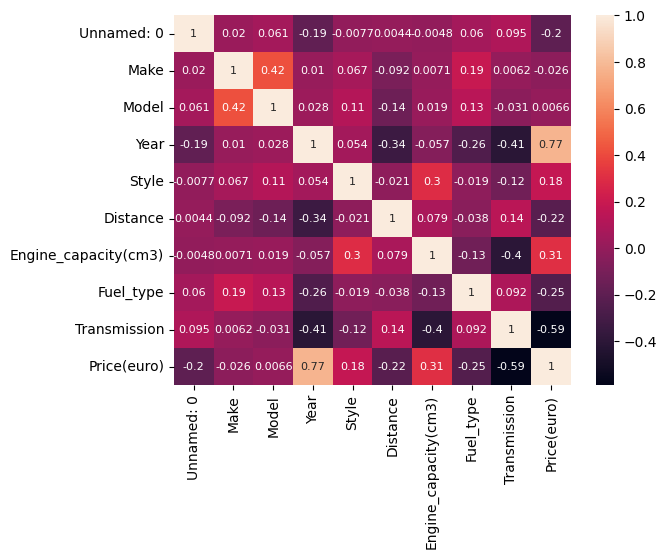

In [15]:
fig = sns.heatmap(models.corr(method='spearman'), annot=True, annot_kws={"fontsize":8}).get_figure()

<b>Вывод</b>:

- Есть сильная кореляция между годом и ценной, вызванная скорей всего инфляцией.
- Есть сильная кореляция между моделью и производителем, вызванная уникальным модельным рядом каждого производителя.
- Существует шанс кореляции стиля и диаметра цилиндра.
- Существует шанс кореляции стиля и цены.

#### Год/Стиль

In [16]:
style_counts = dict(df['Style'].value_counts())
mid_style_count = sum(style_counts.values()) // len(style_counts)


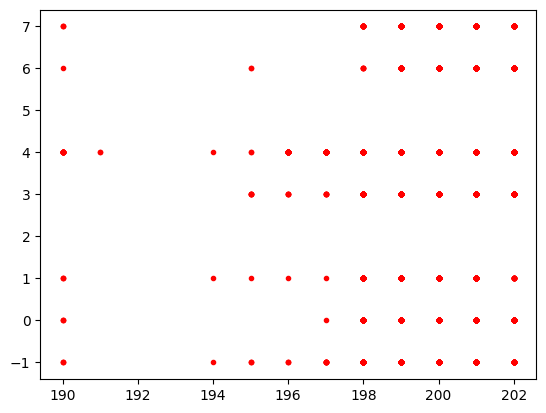

In [28]:
plt.plot(df['Year'].map(lambda a: a//10), df['Style'].map(lambda a: a if style_counts[a] >= mid_style_count else -1), 'ro', markersize=3)


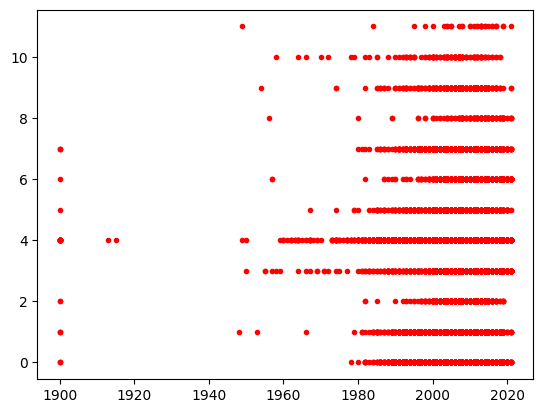

In [29]:
plt.plot(df['Year'].map(lambda a: a//1), df['Style'], 'ro', markersize=3)

<b>Вывод:</b> cтили от года никак не зависят. Сее следует из последнего полу века.

#### Диаметр цилиндра/Дистанция

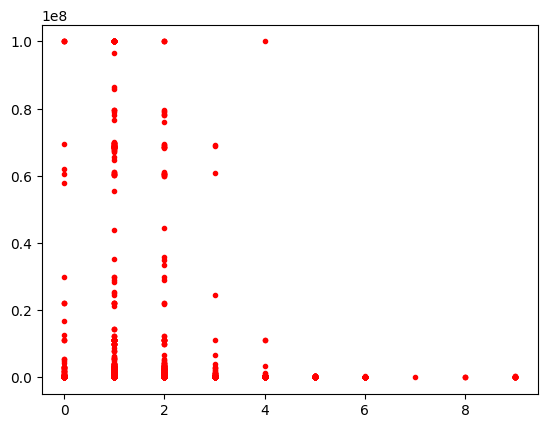

In [30]:
plt.plot(df['Engine_capacity(cm3)'].map(lambda a: a//1000), df['Distance'], 'ro', markersize=3)

<b>Вывод:</b> заметна гипербола.